In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Trading & Backtesting

In [2]:
# Download the Adj Close Price of GOLD
df_gld = pdr.get_data_yahoo('^GSPC', '2000-01-01')[['Adj Close']]

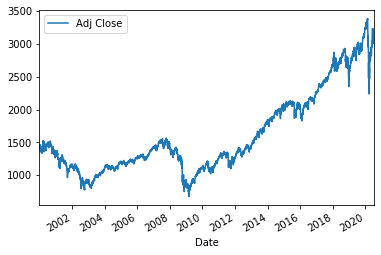

In [3]:
df_gld.plot()

### Derive some new data
- 9 Day - Fast
- 21 Day - Slow
- Log of Returns

In [4]:
df_gld

,Adj Close
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971
...,...
2020-07-13,3155.219971
2020-07-14,3197.520020
2020-07-15,3226.560059


In [5]:
df_gld['Fast'] = df_gld['Adj Close'].rolling(9).mean()
df_gld['Slow'] = df_gld['Adj Close'].rolling(21).mean()
df_gld['Change'] = np.log(df_gld['Adj Close'] / df_gld['Adj Close'].shift())

pd.concat([df_gld.head(), df_gld.tail()])

,Adj Close,Fast,Slow,Change
Date,,,,
2000-01-03,1455.219971,NaN,NaN,NaN
2000-01-04,1399.420044,NaN,NaN,-0.039099
2000-01-05,1402.109985,NaN,NaN,0.001920
2000-01-06,1403.449951,NaN,NaN,0.000955
2000-01-07,1441.469971,NaN,NaN,0.026730
2020-07-13,3155.219971,3148.161133,3111.342413,-0.009407
2020-07-14,3197.520020,3158.964464,3118.780983,0.013317
2020-07-15,3226.560059,3171.264459,3126.398600,0.009041
2020-07-16,3215.570068,3180.771132,3130.723842,-0.003412


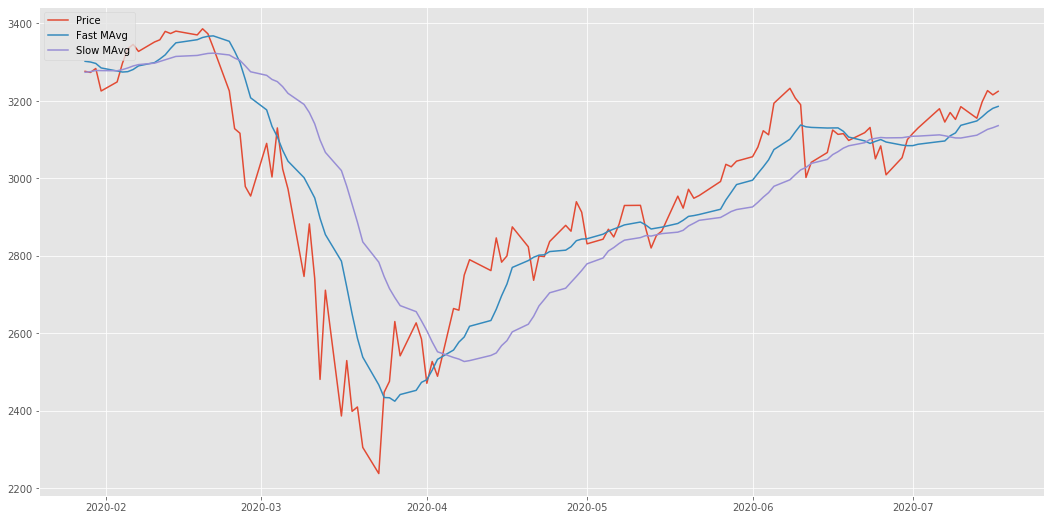

In [6]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(18,9))
    plt.plot(df_gld['Adj Close'][-120:], label='Price')
    plt.plot(df_gld['Fast'][-120:], label='Fast MAvg')
    plt.plot(df_gld['Slow'][-120:], label='Slow MAvg')
    plt.legend(loc=2)

### Strategy
- Fast > Slow then GO long

- Fast < Slow GO short

In [7]:
LONG = 1
NEUTRAL = 0
SHORT = -1

df_gld['Position'] = np.where(df_gld['Fast'] > df_gld['Slow'], LONG , NEUTRAL)
df_gld['Position'] = np.where(df_gld['Fast'] < df_gld['Slow'], SHORT, df_gld['Position'])

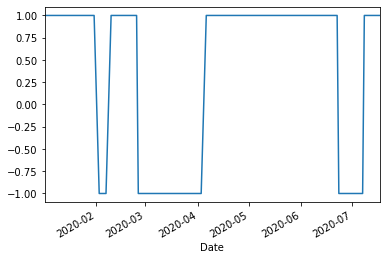

In [8]:
df_gld['2020']['Position'].plot()

### BackTest - Find performance of strategy

In [9]:
df_gld['Strategy'] = df_gld['Position'] * df_gld['Change']

### Compare Strategy against Market

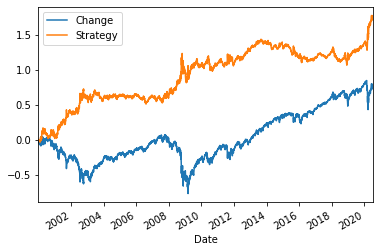

In [10]:
df_gld[['Change', 'Strategy']].cumsum().plot()

In [11]:
df_gld.tail()

,Adj Close,Fast,Slow,Change,Position,Strategy
Date,,,,,,
2020-07-13,3155.219971,3148.161133,3111.342413,-0.009407,1,-0.009407
2020-07-14,3197.520020,3158.964464,3118.780983,0.013317,1,0.013317
2020-07-15,3226.560059,3171.264459,3126.398600,0.009041,1,0.009041
2020-07-16,3215.570068,3180.771132,3130.723842,-0.003412,1,-0.003412
2020-07-17,3224.729980,3185.772244,3136.020984,0.002845,1,0.002845
